In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
Gapp_review = pd.read_csv('googleplaystore_user_reviews.csv')
Gapp_info = pd.read_csv('googleplaystore.csv')

## App Reviews

In [136]:
# check null value
Gapp_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [23]:
# remove Translated_Review = null
Gapp_review.dropna(subset=['Translated_Review'], inplace = True)
Gapp_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [24]:
# Check duplicate
print(Gapp_review.duplicated().sum())
Gapp_review.drop_duplicates(keep = 'first', inplace = True)
Gapp_review.reset_index(inplace = True, drop = True)
Gapp_review.head()

7735


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


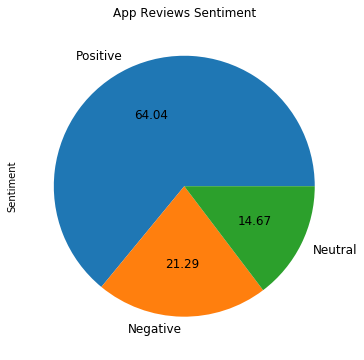

In [6]:
plt.figure(figsize=(6,6))
Gapp_review.Sentiment.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('App Reviews Sentiment')
plt.show()

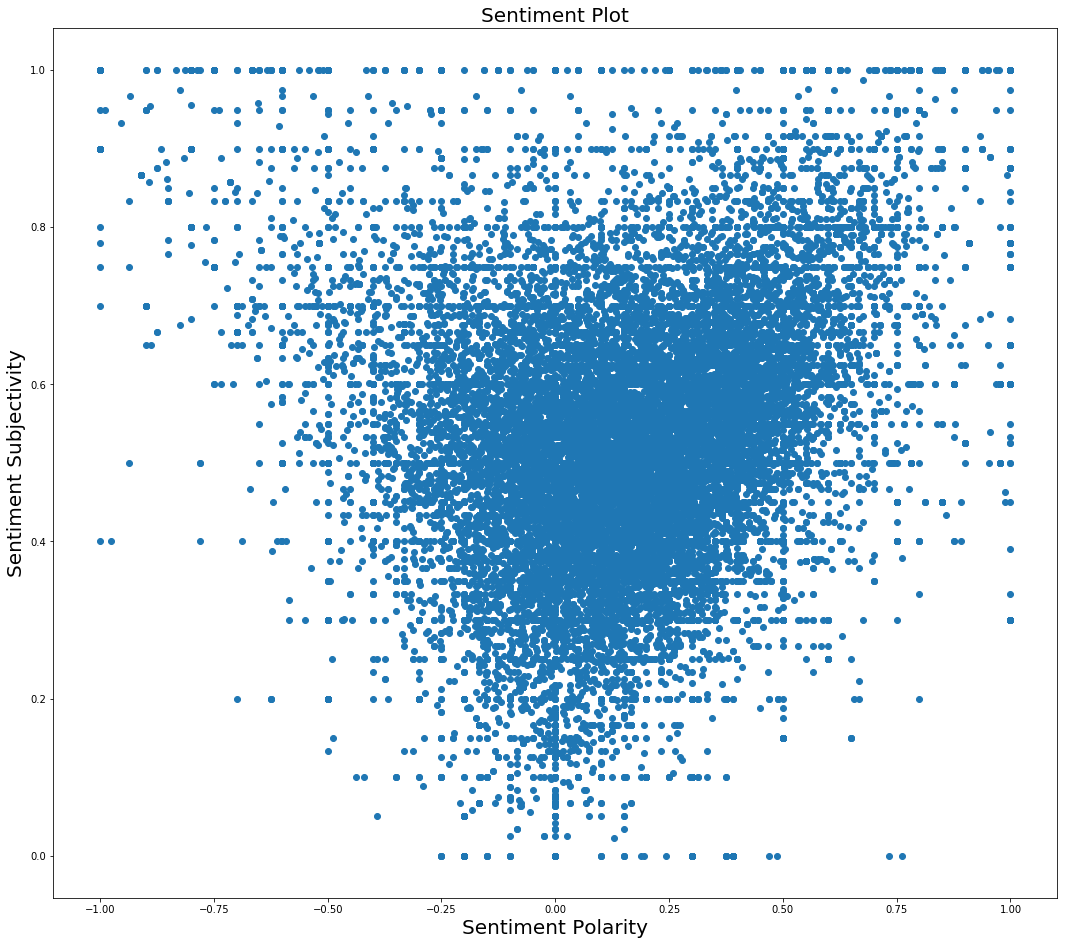

In [61]:
# plot the sentiment
plt.figure(figsize=(18,16))
plt.scatter(Gapp_review['Sentiment_Polarity'],Gapp_review['Sentiment_Subjectivity'])
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title('Sentiment Plot', fontsize=20)
plt.show()

## App Information

In [25]:
# rename 
Gapp_info.rename(columns = {'Type': 'Price_Type','Content Rating': 'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver': 'Current_Ver', 'Android Ver':'Android_Ver'}, inplace= True)
Gapp_info.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
# remove rating = null
Gapp_info.dropna(subset=['Rating'], inplace = True)
Gapp_info.drop_duplicates(keep = 'first', inplace = True)

Gapp_info.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
Gapp_info_re = Gapp_info.drop(columns = ['Genres', 'Last_Updated', 'Current_Ver','Android_Ver'])
Gapp_info_re.drop_duplicates(keep = 'first', inplace = True)
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [48]:
Gapp_info_re = Gapp_info_re[Gapp_info_re.Rating != 19.0]
Gapp_info_re = Gapp_info_re[Gapp_info_re.Price != 'Everyone']
Gapp_info_re = Gapp_info_re[Gapp_info_re.Category != '1.9']
Gapp_info_re = Gapp_info_re[Gapp_info_re.Installs != 'Free']
Gapp_info_re.drop_duplicates(subset = 'App', keep = 'first', inplace = True)
Gapp_info_re.reset_index(inplace = True, drop = True)

In [49]:
Gapp_info_re = Gapp_info_re.replace('10,000+', 10000)
Gapp_info_re = Gapp_info_re.replace('500,000+', 500000)
Gapp_info_re = Gapp_info_re.replace('5,000,000+', 5000000)
Gapp_info_re = Gapp_info_re.replace('50,000,000+', 50000000)
Gapp_info_re = Gapp_info_re.replace('100,000+', 100000)
Gapp_info_re = Gapp_info_re.replace('1,000,000+', 1000000)
Gapp_info_re = Gapp_info_re.replace('10,000,000+', 10000000)
Gapp_info_re = Gapp_info_re.replace('5,000+', 5000)
Gapp_info_re = Gapp_info_re.replace('100,000,000+', 100000000)
Gapp_info_re = Gapp_info_re.replace('1,000,000,000+', 1000000000)
Gapp_info_re = Gapp_info_re.replace('1,000+', 1000)
Gapp_info_re = Gapp_info_re.replace('500,000,000+', 500000000)
Gapp_info_re = Gapp_info_re.replace('100+', 100)
Gapp_info_re = Gapp_info_re.replace('500+', 500)
Gapp_info_re = Gapp_info_re.replace('10+', 10)
Gapp_info_re = Gapp_info_re.replace('5+', 5)
Gapp_info_re = Gapp_info_re.replace('50+', 50)
Gapp_info_re = Gapp_info_re.replace('1+', 1)
Gapp_info_re = Gapp_info_re.replace('50,000+', 50000)

In [50]:
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone


# The Most Frequent Words for the App Reviews

In [31]:
Gapp_review_only = Gapp_review.drop(columns = ['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], axis = 1)
Gapp_review_only.head()

,App,Translated_Review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store
3,10 Best Foods for You,Best idea us
4,10 Best Foods for You,Best way


In [32]:
# combine the reviews for the same app
App = Gapp_review_only.groupby('App')
Gapp_review_only = App.sum()
Gapp_review_only.reset_index(inplace = True, drop = False)
Gapp_review_only.head()

,App,Translated_Review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"GreatniceAlmost mobile phoneVery effective, ef..."
2,11st,Horrible ID verificationEasy even basic Korean...
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,..."


In [14]:
# Find the top three most frequent words
'''
for i in range(Gapp_review_only.shape[0]):
    words = Gapp_review_only['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Gapp_review_only.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Gapp_review_only.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Gapp_review_only.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        Gapp_review_only.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Gapp_review_only.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    else:
        Gapp_review_only.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
        
Gapp_review_only.to_csv('Gapp_review_only.csv')        
'''        

"\nfor i in range(Gapp_review_only.shape[0]):\n    words = Gapp_review_only['Translated_Review'][i]\n    # remove punctuation\n    tokenizer = RegexpTokenizer(r'\\w+') \n    word_list = tokenizer.tokenize(words) \n    # lowercase and remove stopwords\n    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] \n    # word frequence\n    word_frequence = nltk.FreqDist(word_list)\n    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)\n    if sort_freq.shape[0] >= 3:\n        Gapp_review_only.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    \n        Gapp_review_only.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]\n        Gapp_review_only.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]\n    elif sort_freq.shape[0] >= 2:\n        Gapp_review_only.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    \n        Gapp_review_only.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]\n    else:\n        Gapp_review_only.loc[i, 'most_freq_

In [33]:
Gapp_review_only = pd.read_csv('Gapp_review_only.csv', index_col = 0)
Gapp_review_only.head()

,App,Translated_Review,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,i,good,food
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"GreatniceAlmost mobile phoneVery effective, ef...",easy,use,job
2,11st,Horrible ID verificationEasy even basic Korean...,i,app,it
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,easy,i,contacts
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",game,play,i


In [17]:
Gapp_review_most_freq1 = Gapp_review_only.most_freq_word_1st.value_counts()
Gapp_review_most_freq1 = Gapp_review_most_freq1.drop('i')
Gapp_review_most_freq1 = Gapp_review_most_freq1.drop('it')
Gapp_review_most_freq1 = Gapp_review_most_freq1.drop('the')


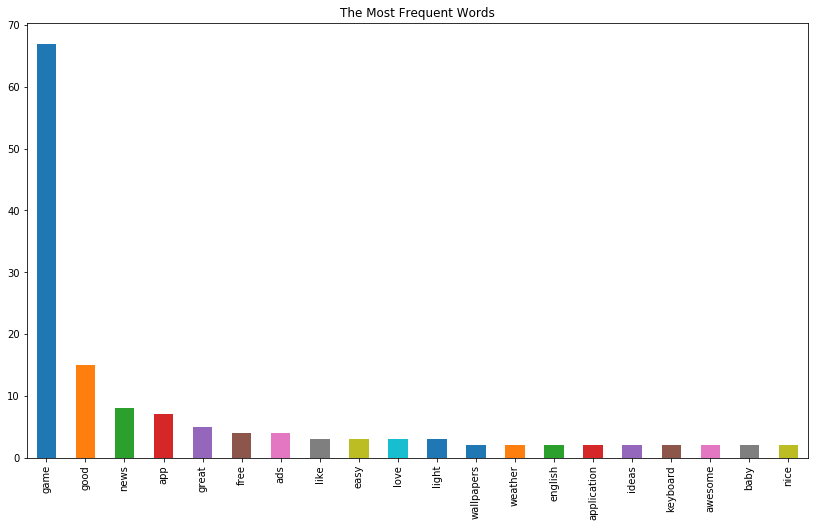

In [18]:
plt.figure(figsize=(14,8))
plt.title('The Most Frequent Words')
Gapp_review_most_freq1.head(20).plot.bar()

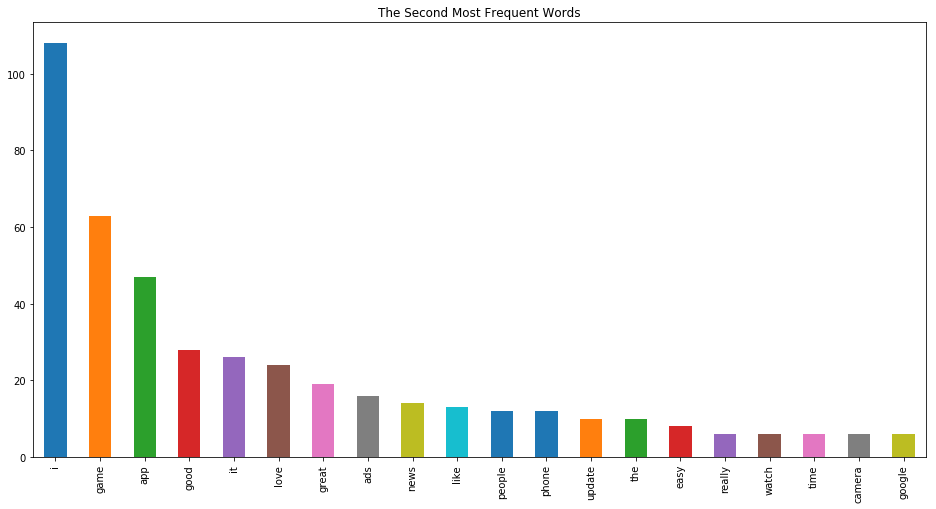

In [117]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Gapp_review_only.most_freq_word_2nd.value_counts().head(20).plot.bar()

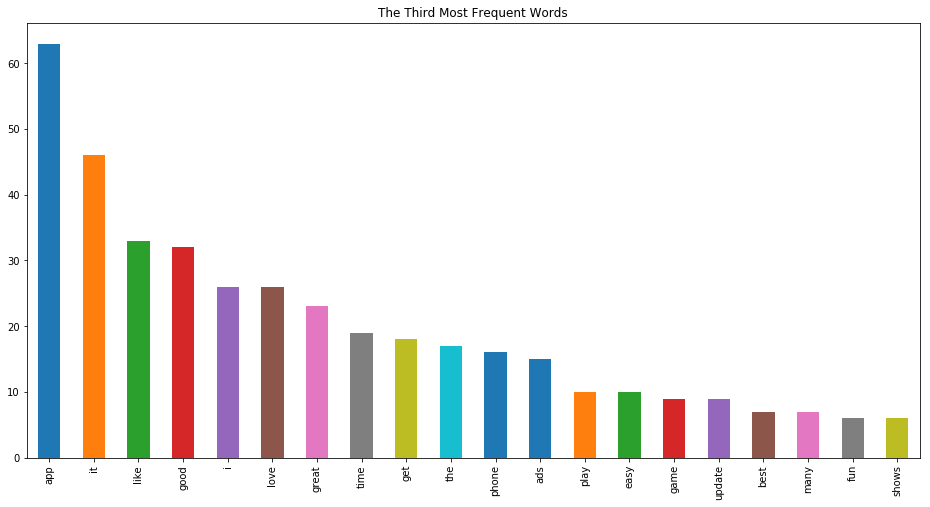

In [118]:
plt.figure(figsize=(16,8))
plt.title('The Third Most Frequent Words')
Gapp_review_only.most_freq_word_3rd.value_counts().head(20).plot.bar()

#### Word Cloud for all the reviews

In [18]:
All_re = []
for i in range(Gapp_review_only.shape[0]):
    reviews = Gapp_review_only['Translated_Review'][i]
    All_re.append(reviews)

#Search for all non-letters, Replace all non-letters with spaces
All_re = re.sub("[^a-zA-Z]",  " ", str(All_re))

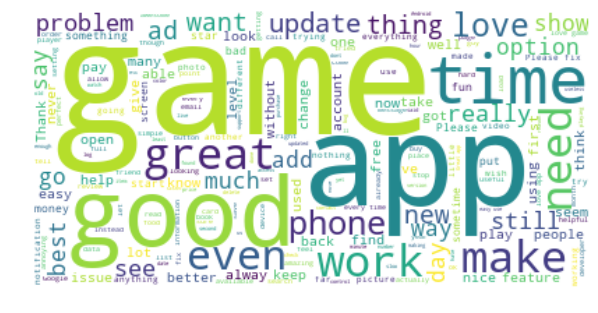

In [19]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(All_re)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Separate the Positive, Negative and Neutral reviews

### Positive

In [35]:
# Positive Reviews

Positive = Gapp_review[Gapp_review['Sentiment'] == 'Positive'] 
Positive.reset_index(inplace = True, drop = True)

In [36]:
Positive.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [22]:
# Find the top three most frequent words
'''
for i in range(Positive.shape[0]):
    words = Positive['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Positive.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Positive.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Positive.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        Positive.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Positive.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] == 1:
        Positive.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else:
        Positive.loc[i, 'most_freq_word_1st'] = 'NAN'
'''        

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
#Positive.to_csv('Positive.csv')
Positive = pd.read_csv('Positive.csv', index_col=0)
Positive.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,i,food,best
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,basis,regular,exercise
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,store,grocery,going
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,us,idea,best
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,way,best,NaN


In [22]:
Positive_most_freq1 = Positive.most_freq_word_1st.value_counts()
Positive_most_freq1 = Positive_most_freq1.drop('i')
Positive_most_freq1 = Positive_most_freq1.drop('it')
Positive_most_freq1 = Positive_most_freq1.drop('the')


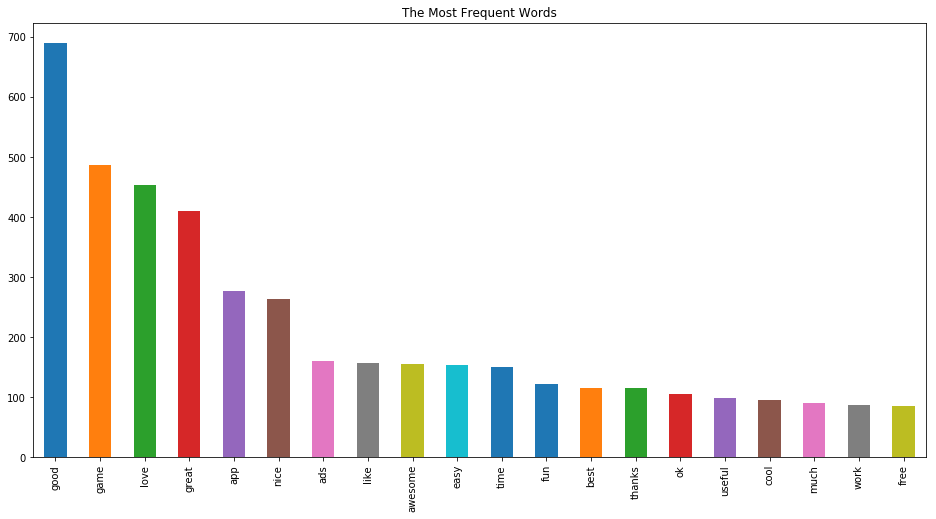

In [89]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
Positive_most_freq1.head(20).plot.bar()

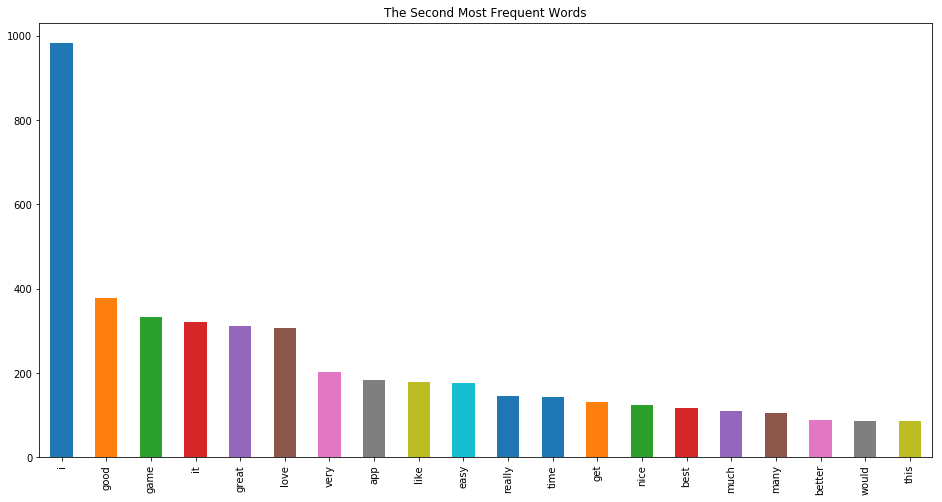

In [120]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Positive.most_freq_word_2nd.value_counts().head(20).plot.bar()

#### Word Cloud for positive reviews

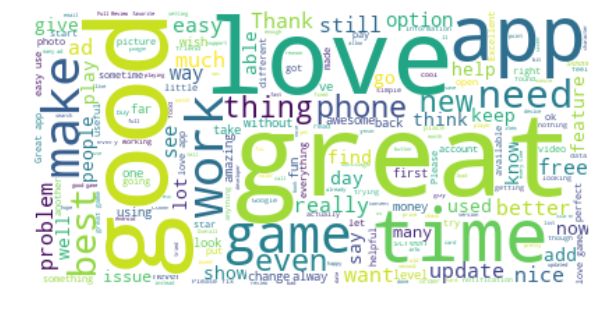

In [38]:
Positive_re = []
for i in range(Positive.shape[0]):
    reviews = Positive['Translated_Review'][i]
    Positive_re.append(reviews)

#Search for all non-letters, Replace all non-letters with spaces
Positive_re = re.sub("[^a-zA-Z]",  " ", str(Positive_re))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Positive_re)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Neutral

In [38]:
# Neutral Reviews 

Neutral = Gapp_review[Gapp_review['Sentiment'] == 'Neutral'] 
Neutral.reset_index(inplace = True, drop = True)
Neutral.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
1,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
2,10 Best Foods for You,God health,Neutral,0.0,0.0
3,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
4,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [26]:
# Find the top three most frequent words
'''
for i in range(Neutral.shape[0]):
    words = Neutral['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Neutral.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Neutral.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Neutral.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        Neutral.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Neutral.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] == 1:
        Neutral.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else:
        Neutral.loc[i, 'most_freq_word_1st'] = 'NAN'
'''      

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
#Neutral.to_csv('Neutral.csv')
Neutral = pd.read_csv('Neutral.csv', index_col=0)
Neutral.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0,app,forward,looking
1,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0,it,get,foods
2,10 Best Foods for You,God health,Neutral,0.0,0.0,health,god,NaN
3,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0,health,form,wealth
4,10 Best Foods for You,On test....,Neutral,0.0,0.0,test,on,NaN


In [25]:
Neutral_most_freq1 = Neutral.most_freq_word_1st.value_counts()
Neutral_most_freq1 = Neutral_most_freq1.drop('i')
Neutral_most_freq1 = Neutral_most_freq1.drop('it')
Neutral_most_freq1 = Neutral_most_freq1.drop('yet')

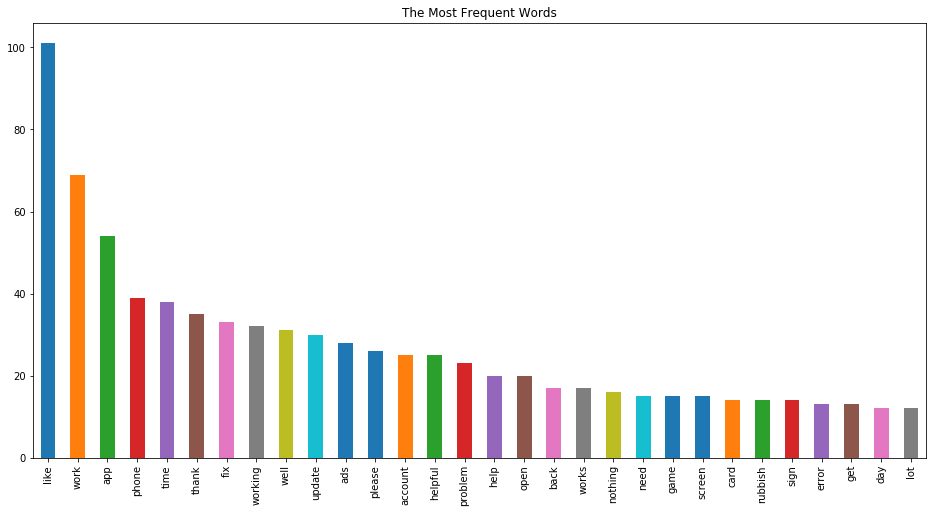

In [110]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
Neutral_most_freq1.head(30).plot.bar()

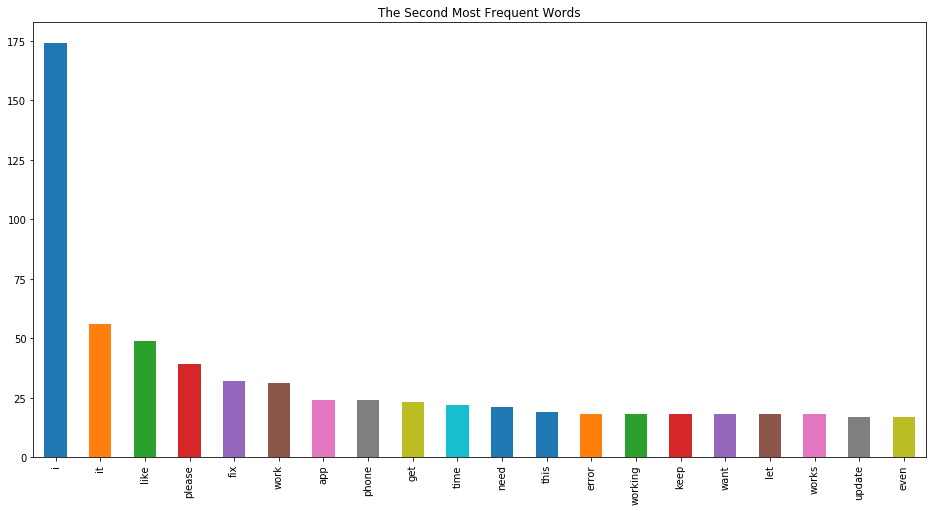

In [121]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Neutral.most_freq_word_2nd.value_counts().head(20).plot.bar()

#### Word Cloud for Neutral reviews

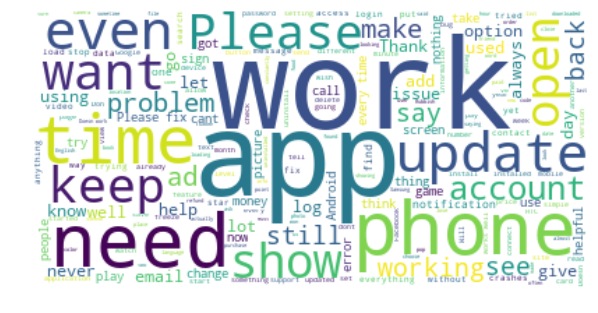

In [39]:
Neutral_re = []
for i in range(Neutral.shape[0]):
    reviews = Neutral['Translated_Review'][i]
    Neutral_re.append(reviews)

#Search for all non-letters, Replace all non-letters with spaces
Neutral_re = re.sub("[^a-zA-Z]",  " ", str(Neutral_re))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Neutral_re)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative

In [40]:
# Negative Reviews

Negative = Gapp_review[Gapp_review['Sentiment'] == 'Negative'] 
Negative.reset_index(inplace = True, drop = True)
Negative.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
1,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
2,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
3,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
4,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [32]:
# Find the top three most frequent words
'''
for i in range(Negative.shape[0]):
    words = Negative['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Negative.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Negative.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Negative.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        Negative.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Negative.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] == 1:
        Negative.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else:
        Negative.loc[i, 'most_freq_word_1st'] = 'NAN'
'''       

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
#Negative.to_csv('Negative.csv')
Negative = pd.read_csv('Negative.csv', index_col=0)
Negative.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500,book,recipe,unable
1,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000,time,information,calls
2,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000,time,ur,waste
3,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800,work,doesn,crap
4,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475,texts,old,poor


In [20]:
Negative_most_freq1 = Negative.most_freq_word_1st.value_counts()
Negative_most_freq1 = Negative_most_freq1.drop('i')
Negative_most_freq1 = Negative_most_freq1.drop('it')
Negative_most_freq1 = Negative_most_freq1.drop('the')
Negative_most_freq1 = Negative_most_freq1.drop('u')


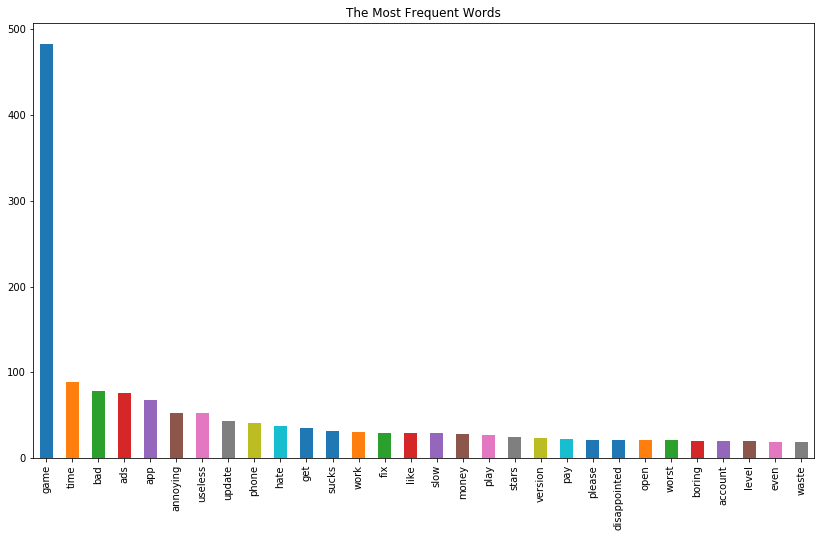

In [21]:
plt.figure(figsize=(14,8))
plt.title('The Most Frequent Words')
Negative_most_freq1.head(30).plot.bar()

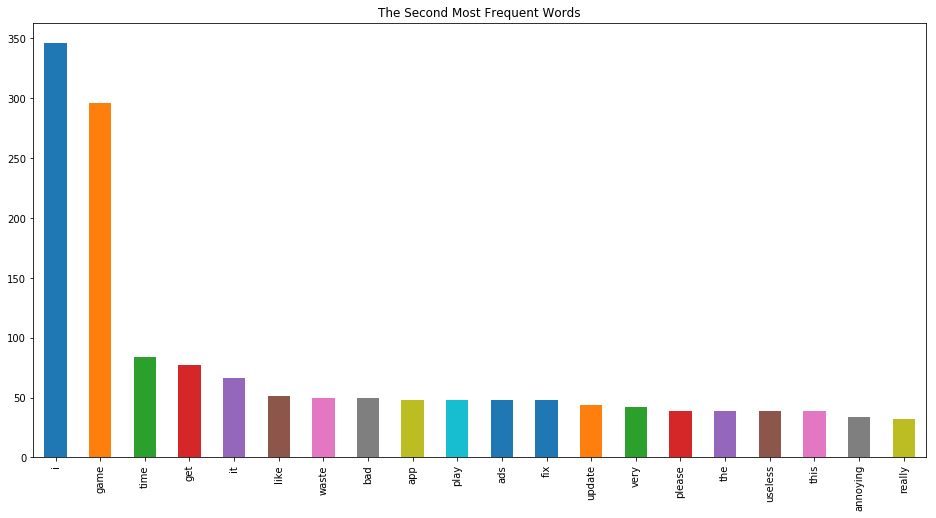

In [122]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Negative.most_freq_word_2nd.value_counts().head(20).plot.bar()

#### Word Cloud for Negative Reviews

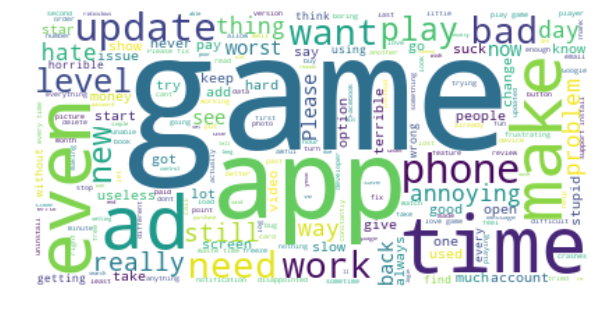

In [41]:
Negative_re = []
for i in range(Negative.shape[0]):
    reviews = Negative['Translated_Review'][i]
    Negative_re.append(reviews)

#Search for all non-letters, Replace all non-letters with spaces
Negative_re = re.sub("[^a-zA-Z]",  " ", str(Negative_re))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Negative_re)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The most frequent words in the Facebook reviews

In [42]:
Gapp_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [43]:
Facebook = Gapp_review[Gapp_review['App'] == 'Facebook'] 
Facebook.reset_index(inplace = True, drop = True)
Facebook.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Facebook,"If I open link different browser, refreshes fe...",Positive,0.080096,0.343251
1,Facebook,I believe lot Google need slow little. There e...,Positive,0.103356,0.533796
2,Facebook,I know went wrong app. I issues facebook visit...,Negative,-0.366667,0.544444
3,Facebook,1 star can't move photos timeline post album. ...,Negative,-0.405556,0.625000
4,Facebook,"This used work well, past 2 months I gotten no...",Positive,0.116667,0.425000


In [125]:
for i in range(Facebook.shape[0]):
    words = Facebook['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Facebook.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Facebook.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Facebook.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        Facebook.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Facebook.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    else:
        Facebook.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [127]:
Facebook_most_freq1 = Facebook.most_freq_word_1st.value_counts()
Facebook_most_freq1 = Facebook_most_freq1.drop('i')


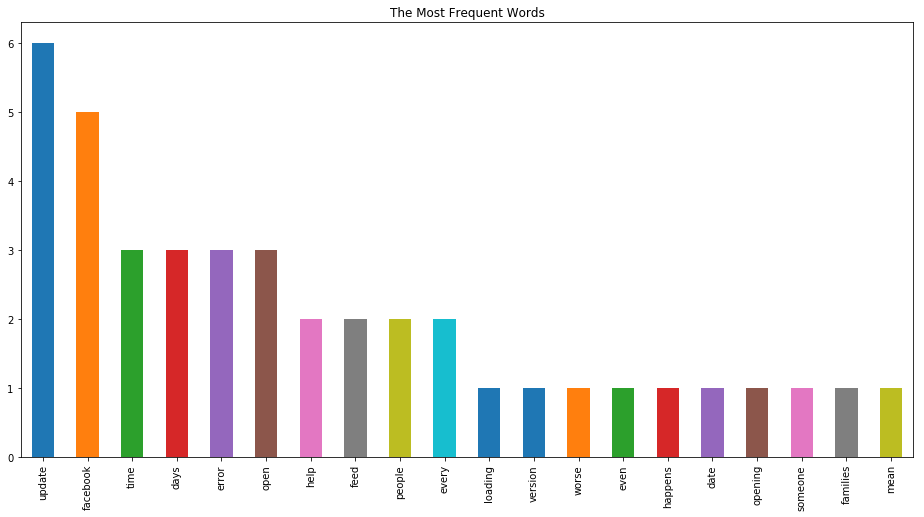

In [128]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
Facebook_most_freq1.head(20).plot.bar()

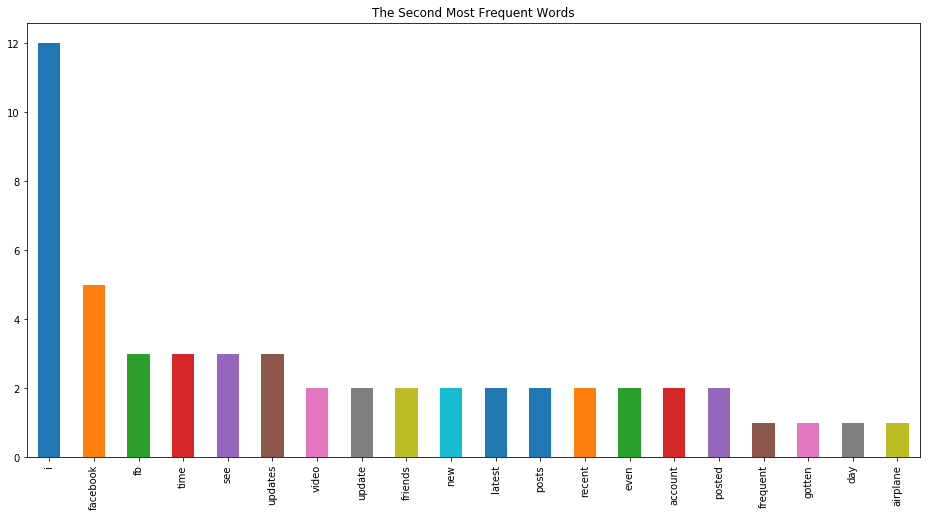

In [129]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Facebook.most_freq_word_2nd.value_counts().head(20).plot.bar()

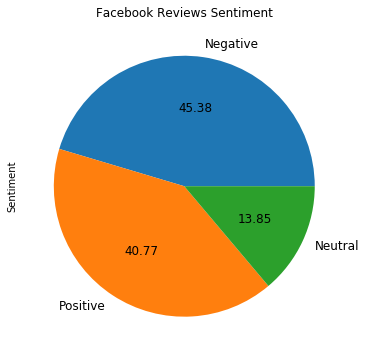

In [43]:
plt.figure(figsize=(6,6))
Facebook.Sentiment.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Facebook Reviews Sentiment')
plt.show()

In [79]:
Facebook_re = []
for i in range(Facebook.shape[0]):
    review = Facebook['Translated_Review'][i]
    Facebook_re.append(review)

#Search for all non-letters, Replace all non-letters with spaces
Facebook_re = re.sub("[^a-zA-Z]",  " ", str(Facebook_re))

#### Word Cloud for all the reviews

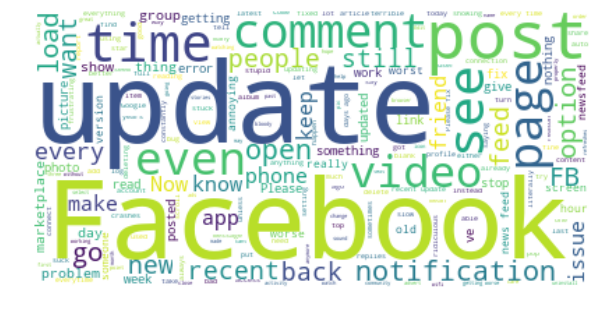

In [87]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Facebook_re)
# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
Episode = Gapp_review[Gapp_review['App'] == 'Episode - Choose Your Story'] 
Episode.reset_index(inplace = True, drop = True)
Episode.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Episode - Choose Your Story,"I love game!!, I like many gems need right cho...",Positive,0.076071,0.456071
1,Episode - Choose Your Story,IT awesome love app. It great graphics. Has 10...,Positive,0.680952,0.730952
2,Episode - Choose Your Story,"I've playing ever since first came out, I love...",Positive,0.281250,0.472917
3,Episode - Choose Your Story,I like game there's problem. The game glitch b...,Negative,-0.220000,0.420000
4,Episode - Choose Your Story,Do always server issues midnight PHT? I always...,Negative,-0.500000,0.200000


In [93]:
for i in range(Episode.shape[0]):
    words = Episode['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    Episode.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [94]:
Episode

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st
0,Episode - Choose Your Story,"I love game!!, I like many gems need right cho...",Positive,0.076071,0.456071,i
1,Episode - Choose Your Story,IT awesome love app. It great graphics. Has 10...,Positive,0.680952,0.730952,it
2,Episode - Choose Your Story,"I've playing ever since first came out, I love...",Positive,0.281250,0.472917,i
3,Episode - Choose Your Story,I like game there's problem. The game glitch b...,Negative,-0.220000,0.420000,game
4,Episode - Choose Your Story,Do always server issues midnight PHT? I always...,Negative,-0.500000,0.200000,always
5,Episode - Choose Your Story,"Downloaded work, even high speed connection ke...",Positive,0.040000,0.360000,i
6,Episode - Choose Your Story,Episode great fun play lots story's read! The ...,Positive,0.295000,0.540000,story
7,Episode - Choose Your Story,Kept saying server timed out! I hadnt able pla...,Negative,-0.231250,0.456250,phone
8,Episode - Choose Your Story,Two days row load. Past two updates done messe...,Negative,-0.138571,0.317143,two
9,Episode - Choose Your Story,"So every time I go episode progress resets, st...",Positive,0.350000,0.550000,i


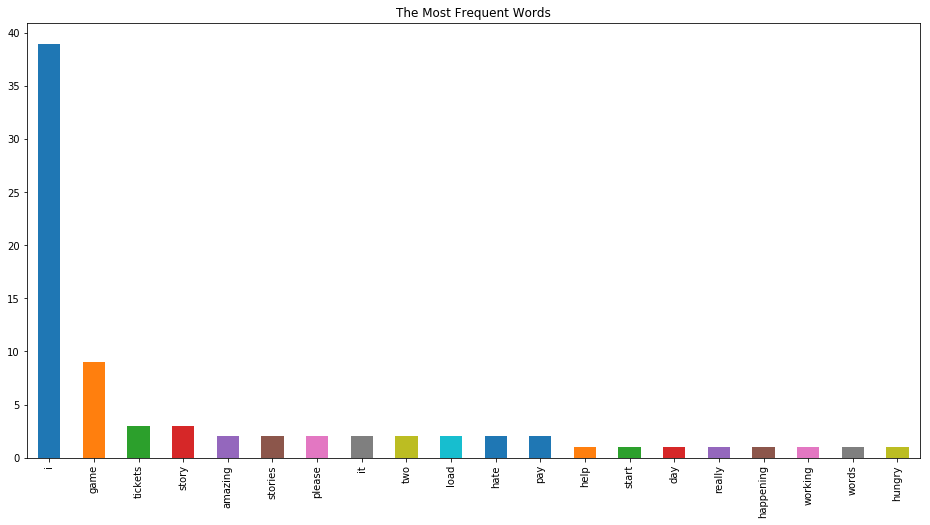

In [56]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
Episode.most_freq_word_1st.value_counts().head(20).plot.bar()

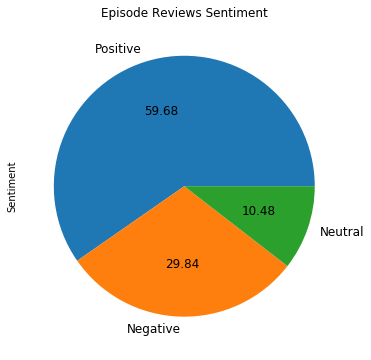

In [57]:
plt.figure(figsize=(6,6))
Episode.Sentiment.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Episode Reviews Sentiment')
plt.show()

In [97]:
Episode_re = []
for i in range(Episode.shape[0]):
    review = Episode['Translated_Review'][i]
    Episode_re.append(review)

#Search for all non-letters, Replace all non-letters with spaces
Episode_re = re.sub("[^a-zA-Z]",  " ", str(Episode_re))

#### Word Cloud for all the reviews

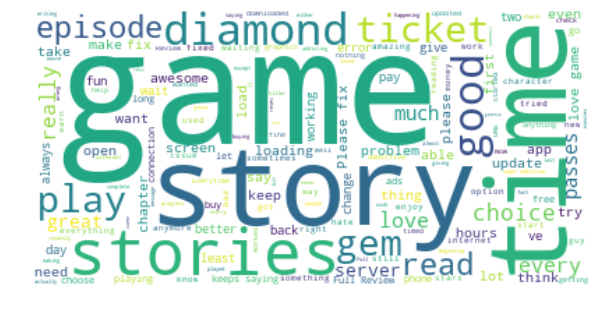

In [98]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Episode_re)
# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top 500 installation Count

In [51]:
Install_count = Gapp_info_re.sort_values('Installs',ascending = False).head(500)
Install_count.reset_index(inplace = True, drop = True)
Install_count.head(10)

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating
0,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen
1,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone
2,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen
3,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen
4,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone
5,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone
6,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone
7,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone
8,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Free,0,Teen
9,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0,Everyone


In [52]:
Install_count_top500 = Gapp_review.loc[Gapp_review['App'].isin(Install_count['App'])]
Install_count_top500.reset_index(inplace = True, drop = True)
Install_count_top500.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,11st,Horrible ID verification,Negative,-1.000000,1.000000
1,11st,Easy even basic Korean. Searching English usua...,Positive,0.236667,0.301667
2,11st,Cool,Positive,0.350000,0.650000
3,11st,"I do not collect it for a month, but I will no...",Neutral,0.000000,1.000000
4,11st,Top bar missing newest update. Hard shop can't...,Positive,0.002778,0.363889


In [135]:
# Find the top three most frequent words
'''
for i in range(Install_count_top500.shape[0]):
    words = Install_count_top500['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # convert words to stem
    lemma = nltk.WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        Install_count_top500.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Install_count_top500.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        Install_count_top500.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        A.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        Install_count_top500.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] == 1:
        Install_count_top500.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else:
        Install_count_top500.loc[i, 'most_freq_word_1st'] = 'NAN'
        
Install_count_top500.to_csv('Install_count_top500.csv')        
'''

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
Install_count_top500 = pd.read_csv('Install_count_top500.csv', index_col=0)
Install_count_top500.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,11st,Horrible ID verification,Negative,-1.000000,1.000000,verification,id,horrible
1,11st,Easy even basic Korean. Searching English usua...,Positive,0.236667,0.301667,korean,search,best
2,11st,Cool,Positive,0.350000,0.650000,cool,NaN,NaN
3,11st,"I do not collect it for a month, but I will no...",Neutral,0.000000,1.000000,month,i,call
4,11st,Top bar missing newest update. Hard shop can't...,Positive,0.002778,0.363889,search,shop,hard


In [138]:
instalcount_most_freq1 = Install_count_top500.most_freq_word_1st.value_counts()
instalcount_most_freq1 = instalcount_most_freq1.drop('i')
instalcount_most_freq1 = instalcount_most_freq1.drop('it')
instalcount_most_freq1 = instalcount_most_freq1.drop('the')
instalcount_most_freq1 = instalcount_most_freq1.drop('this')

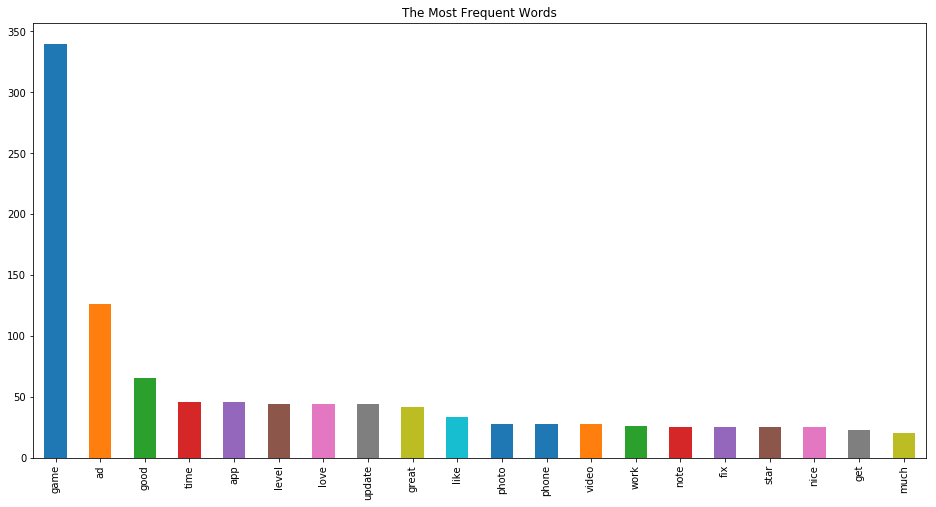

In [140]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
instalcount_most_freq1.head(20).plot.bar()

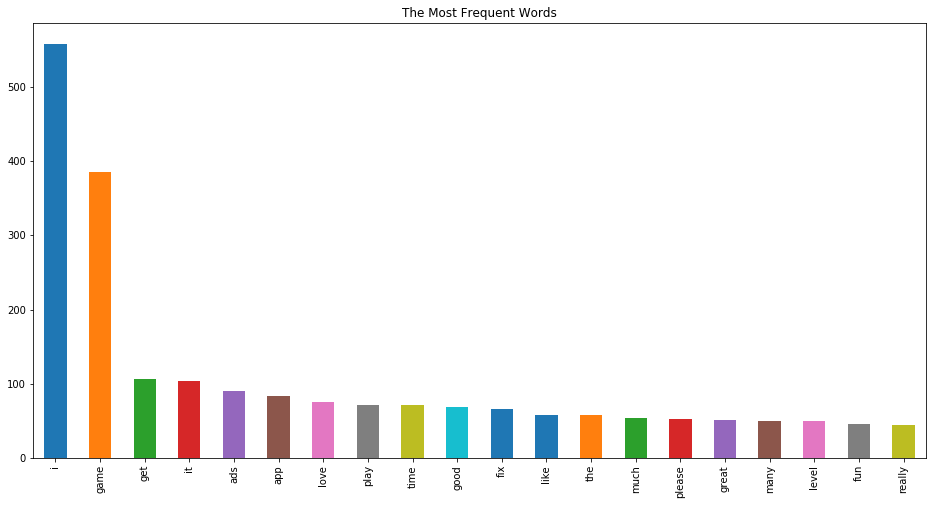

In [101]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
Install_count_top500.most_freq_word_2nd.value_counts().head(20).plot.bar()

#### Word Cloud for all the reviews

In [98]:
Install_count_m_re = []
for i in range(Install_count_top500.shape[0]):
    review = Install_count_top500['Translated_Review'][i]
    Install_count_m_re.append(review)

#Search for all non-letters, Replace all non-letters with spaces
Install_count_m_re = re.sub("[^a-zA-Z]",  " ", str(Install_count_m_re))

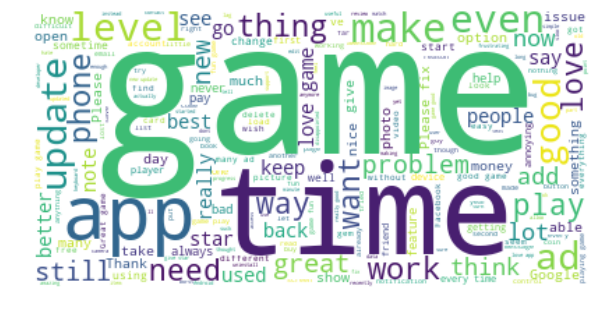

In [99]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(Install_count_m_re)
# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top Rating App reviews

In [54]:
toprating = Gapp_info_re[Gapp_info_re['Rating'] >= 4.0]
toprating.reset_index(inplace = True, drop = True)
toprating.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone


In [55]:
R = Gapp_review.loc[Gapp_review['App'].isin(Install_count['App'])]
R.reset_index(inplace = True, drop = True)
R.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,11st,Horrible ID verification,Negative,-1.000000,1.000000
1,11st,Easy even basic Korean. Searching English usua...,Positive,0.236667,0.301667
2,11st,Cool,Positive,0.350000,0.650000
3,11st,"I do not collect it for a month, but I will no...",Neutral,0.000000,1.000000
4,11st,Top bar missing newest update. Hard shop can't...,Positive,0.002778,0.363889


In [80]:
# Find the top three most frequent words
'''
for i in range(R.shape[0]):
    words = R['Translated_Review'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        R.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        R.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        R.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        R.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]    
        R.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] == 1:
        R.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else:
        R.loc[i, 'most_freq_word_1st'] = 'NAN'
    '''

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
#R.to_csv('toprating_reviews.csv')
toprating_reviews = pd.read_csv('toprating_reviews.csv', index_col = 0)
toprating_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,11st,Horrible ID verification,Negative,-1.000000,1.000000,verification,id,horrible
1,11st,Easy even basic Korean. Searching English usua...,Positive,0.236667,0.301667,korean,search,best
2,11st,Cool,Positive,0.350000,0.650000,cool,NaN,NaN
3,11st,"I do not collect it for a month, but I will no...",Neutral,0.000000,1.000000,month,i,call
4,11st,Top bar missing newest update. Hard shop can't...,Positive,0.002778,0.363889,search,shop,hard


In [88]:
toprating_most_freq1 = toprating_reviews.most_freq_word_1st.value_counts()
toprating_most_freq1 = toprating_most_freq1.drop('i')
toprating_most_freq1 = toprating_most_freq1.drop('it')
toprating_most_freq1 = toprating_most_freq1.drop('the')
toprating_most_freq1 = toprating_most_freq1.drop('this')


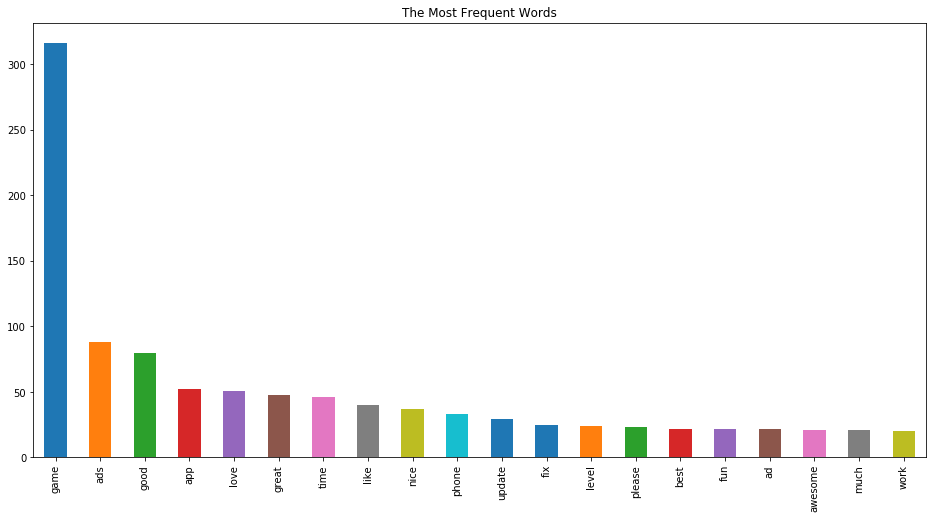

In [89]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
toprating_most_freq1.head(20).plot.bar()

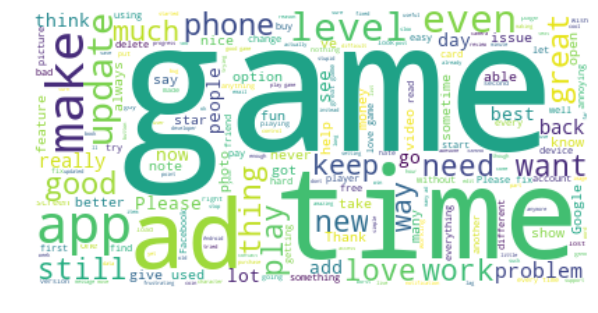

In [100]:
toprating_re = []
for i in range(toprating_reviews.shape[0]):
    reviews = toprating_reviews['Translated_Review'][i]
    toprating_re.append(reviews)

#Search for all non-letters, Replace all non-letters with spaces
toprating_re = re.sub("[^a-zA-Z]",  " ", str(toprating_re))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(toprating_re)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Classification

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc
from scipy import interp
from itertools import cycle

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
all_reviews = []
for i in Gapp_review.Translated_Review:
    words = re.sub("[^a-zA-Z]"," ",i)
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # convert words to stem
    lemma = nltk.WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    text = " ".join(word_list)
    all_reviews.append(text)

In [13]:
max_features = 1000
cou_vec = CountVectorizer(max_features=max_features)
text_matrix = cou_vec.fit_transform(all_reviews).toarray()
all_words = cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:30])

Most used 50 words:  ['ability', 'able', 'absolutely', 'access', 'account', 'accurate', 'across', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot']


In [14]:
apps = []
for i in Gapp_review.App:
    words = re.sub("[^a-zA-Z0-9]"," ",i)
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    app_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    app_list = [word.lower() for word in app_list if word not in stopwords.words('english')] 
    # convert words to stem
    lemma = nltk.WordNetLemmatizer()
    app_list = [lemma.lemmatize(word) for word in app_list]
    text = " ".join(app_list)
    apps.append(text)

In [15]:
max_features = 1000
cou_vec = CountVectorizer(max_features=max_features)
app_matrix = cou_vec.fit_transform(apps).toarray()

### Convert Positive, Neutral, Negative into  1, 0, -1

In [33]:
Sentiment_re = []

for i in Gapp_review.Sentiment:
    if i == 'Positive':
        Sentiment_re.append(1)
    elif i == 'Neutral':
        Sentiment_re.append(0)
    else:
        Sentiment_re.append(-1)
        
Gapp_review['Sentiment_class'] = Sentiment_re
Gapp_review.head()        

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_class
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,1
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,1
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,1
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,1
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,1


## Random Forest Classifire for Positive, Neutral, Negative

In [119]:
train_score = []
test_score = []
F_score = []
Model = [] 

y = Gapp_review.iloc[:,-1:].values
X = text_matrix

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train_std, y_train)
y_pred = rfc.predict(X_test_std)

Model.append('Random Forest Classifier')
train_score.append(rfc.score(X_train_std, y_train))
test_score.append(rfc.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average = 'weighted'))

print('Testing accuracy', rfc.score(X_train_std, y_train))
print('Training accuracy', rfc.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Testing accuracy 0.9886632567371555
Training accuracy 0.8867218808442426


In [120]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1924  150  407]
 [  69 1372  107]
 [ 331  208 6661]]
             precision    recall  f1-score   support

          0       0.83      0.78      0.80      2481
          1       0.79      0.89      0.84      1548
          2       0.93      0.93      0.93      7200

avg / total       0.89      0.89      0.89     11229



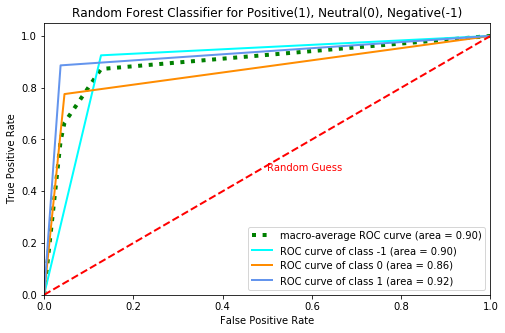

In [121]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(-1, 2):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(-1, 2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(-1, 2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
label='macro-average ROC curve (area = {0:0.2f})'
''.format(roc_auc["macro"]),
color='green', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(-1, 2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
label='ROC curve of class {0} (area = {1:0.2f})'
''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier for Positive(1), Neutral(0), Negative(-1)')
plt.legend(loc="lower right")
plt.show()

## KNN for Positive, Neutral, Negative

In [122]:
y = Gapp_review.iloc[:,-1:].values
X = text_matrix

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

n_neighbors = 5

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test_std)

Model.append('KNN')
train_score.append(knn.score(X_train_std, y_train))
test_score.append(knn.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average = 'weighted'))

print(knn.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.7025558820910144
[[1111  916  454]
 [  51 1432   65]
 [ 446 1408 5346]]
             precision    recall  f1-score   support

          0       0.69      0.45      0.54      2481
          1       0.38      0.93      0.54      1548
          2       0.91      0.74      0.82      7200

avg / total       0.79      0.70      0.72     11229



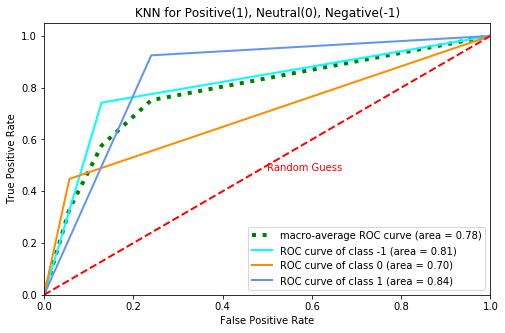

In [123]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(-1, 2):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(-1, 2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(-1, 2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
label='macro-average ROC curve (area = {0:0.2f})'
''.format(roc_auc["macro"]),
color='green', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(-1, 2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
label='ROC curve of class {0} (area = {1:0.2f})'
''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN for Positive(1), Neutral(0), Negative(-1)')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [124]:
y = Gapp_review.iloc[:,-1:].values
X = text_matrix

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test_std)

Model.append('Decision Tree')
train_score.append(dt.score(X_train_std, y_train))
test_score.append(dt.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average = 'weighted'))

print("Decision Tree Testing accuracy: ",dt.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Decision Tree Testing accuracy:  0.8001602992252204
[[1710  132  639]
 [ 256 1099  193]
 [ 838  186 6176]]
             precision    recall  f1-score   support

          0       0.61      0.69      0.65      2481
          1       0.78      0.71      0.74      1548
          2       0.88      0.86      0.87      7200

avg / total       0.81      0.80      0.80     11229



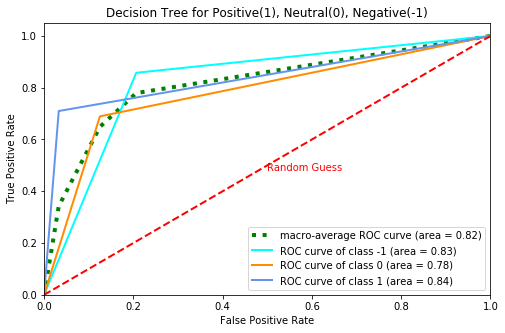

In [125]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(-1, 2):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(-1, 2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(-1, 2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
label='macro-average ROC curve (area = {0:0.2f})'
''.format(roc_auc["macro"]),
color='green', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(-1, 2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
label='ROC curve of class {0} (area = {1:0.2f})'
''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree for Positive(1), Neutral(0), Negative(-1)')
plt.legend(loc="lower right")
plt.show()

In [126]:
Model_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score', 'F1_score'])

for i in range(3):
    Model_comparison.loc[i, 'Classfier_name'] = Model[i]
    Model_comparison.loc[i, 'train_score'] = train_score[i]
    Model_comparison.loc[i, 'test_score'] = test_score[i]
    Model_comparison.loc[i, 'F1_score'] = F_score[i]
    
Model_comparison

,Classfier_name,train_score,test_score,F1_score
0,Random Forest Classifier,0.988663,0.886722,0.886568
1,KNN,0.785556,0.702556,0.719239
2,Decision Tree,0.897664,0.80016,0.80261


# App Classification by Positive, Neutral and Negative

## Random Forest Classification

In [117]:
y = Gapp_review.iloc[:,-1:].values
X = app_matrix

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test_std)

print('Testing accuracy', rfc.score(X_train_std, y_train))
print('Training accuracy', rfc.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Testing accuracy 0.6527597526528742
Training accuracy 0.6349630421230742
[[ 439   73 1969]
 [  93   94 1361]
 [ 423  180 6597]]
             precision    recall  f1-score   support

          0       0.46      0.18      0.26      2481
          1       0.27      0.06      0.10      1548
          2       0.66      0.92      0.77      7200

avg / total       0.57      0.63      0.56     11229



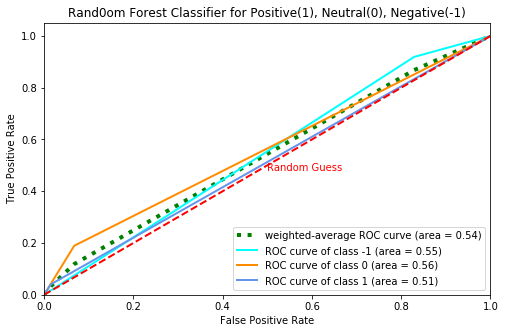

In [104]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(-1, 2):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(-1, 2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(-1, 2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
label='macro-average ROC curve (area = {0:0.2f})'
''.format(roc_auc["macro"]),
color='green', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(-1, 2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
label='ROC curve of class {0} (area = {1:0.2f})'
''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rand0om Forest Classifier for Positive(1), Neutral(0), Negative(-1)')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [114]:
y = Gapp_review.iloc[:,-1:].values
X = app_matrix

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Training accuracy: ",dt.score(X_train,y_train))
print("Decision Tree Testing accuracy: ",dt.score(X_test,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Decision Tree Testing accuracy:  0.638881467628462
[[ 423   65 1993]
 [ 111   89 1348]
 [ 411  127 6662]]
             precision    recall  f1-score   support

          0       0.45      0.17      0.25      2481
          1       0.32      0.06      0.10      1548
          2       0.67      0.93      0.77      7200

avg / total       0.57      0.64      0.56     11229



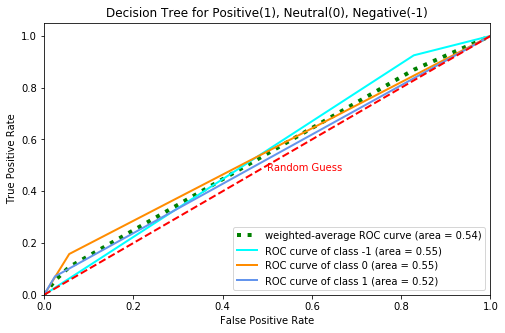

In [101]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(-1, 2):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(-1, 2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(-1, 2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
label='macro-average ROC curve (area = {0:0.2f})'
''.format(roc_auc["macro"]),
color='green', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(-1, 2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
label='ROC curve of class {0} (area = {1:0.2f})'
''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree for Positive(1), Neutral(0), Negative(-1)')
plt.legend(loc="lower right")
plt.show()